<a href="https://colab.research.google.com/github/pythience/Desafio3/blob/master/7_Desafio3_Mejor_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío 3: Selección del mejor modelo

## Aplicamos `Pipelines` y `GridSearch/RandomSearch` sobre múltiples modelos de `scikit-learn` con los datos de intenciones de compras en línea balanceados con `SMOTE`.

## 1. Introducción

**Información del DataSet:**

El dataset consiste en vectores de características que pertenecen a 12330 sesiones. 
El conjunto de datos se conformó de manera que cada sesión pertenezca a un usuario diferente en un período de 1 año para evitar cualquier tendencia a una campaña específica, día especial, perfil de usuario o período. 

El conjunto de datos original consta de 10 atributos numéricos y 8 atributos categóricos. 
El atributo *'Revenue'* (Ingresos) se utiliza como etiqueta de clasificación. 

*"Administrative"* (Administrativa), *"Administrative Duration"* (Duración administrativa), *"Informational"* (Informativa), *"Informational Duration"* (Duración informativa), *"Product Related"* (Producto relacionado) y *"Product Related Duration"* (Duración producto relacionado) representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada una de estas categorías de páginas. Los valores de estas funciones se derivan de la información de URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, por ejemplo: pasar de una página a otra. 

*Respecto a Google Analytics:*
Las características *"Bounce Rate"* (Tasa de rebote), *"Exit Rate"* (Tasa de salida) y ***"Page Value"* (Valor de la página)** representan las métricas medidas por "Google Analytics" para cada página en el sitio de comercio electrónico. El valor de la función "Índice de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebote") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la columna "Tasa de salida" para una página web específica se calcula como el porcentaje del total de páginas en cada página fue la última en ser visitada en la sesión. La característica **"Valor de página"** representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico. 

*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset*


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# para Anaconda:
path = ''

# para Cristian en Colab:
path='gdrive/My Drive/DataScience - DH/Desafio3/'



---



---



In [0]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import savefig

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
df = pd.read_pickle('{}online_shoppers_intention_dummies.pkl'.format(path))

## Armamos las matrices de `features (X)` y de `target (y)`


In [0]:
display(df.head())
df.columns

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,New_Visitor,Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0,1,1


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue',
       'New_Visitor', 'Returning_Visitor', 'Weekend_True'],
      dtype='object')

In [0]:
#continuos_features
#categorical_features
#dummies_features

In [0]:
X = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'New_Visitor', 'Returning_Visitor', 'Weekend_True']]
y = df["Revenue"]

In [0]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print('y==True: {}'.format(y.sum()))

X: (12330, 18)
y: (12330,)
y==True: 1908


### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# obtenemos los datos de train y test desde los datos originales:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [0]:
print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_train: {}'.format(y_train.shape))
print('y_train==True: {}'.format(y_train.sum()))
print('y_test: {}'.format(y_test.shape))
print('y_test==True: {}'.format(y_test.sum()))


X_train: (9247, 18)
X_test: (3083, 18)
y_train: (9247,)
y_train==True: 1422
y_test: (3083,)
y_test==True: 486


en este listado se observa claramente el desbalanceo de los datos, tanto en train como en test, por lo que se necesita implementar alguna técnica de balanceo sobre los datos de entrenamiento de los distintos modelos.


---



In [0]:
#X_train[X_train.duplicated()]
print(X_test[X_test.duplicated()].shape)
display(X_test[X_test.duplicated()])

(12, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,New_Visitor,Returning_Visitor,Weekend_True
2130,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,5,2,4,1,3,0,1,0
3577,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,5,2,2,1,4,0,1,0
7635,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,6,3,2,3,13,0,1,0
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,12,1,1,4,1,0,1,1
10631,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,11,2,2,1,1,0,1,0
1213,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,3,3,2,3,1,0,1,0
11801,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,12,1,1,4,1,0,1,1
5043,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,5,2,2,1,3,0,1,0
540,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,3,3,2,3,1,0,1,0
3272,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,5,1,1,3,3,0,1,0


### Balanceo de target con `SMOTE`

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',k_neighbors=5)
X_bal_train, y_bal_train = sm.fit_sample(X_train, y_train)

In [0]:
print(X_bal_train.shape)
print(y_bal_train.shape)
print('y_bal_train==True: {}'.format(y_bal_train.sum()))

(15650, 18)
(15650,)
y_bal_train==True: 7825


####persistimos el dataset balanceado para futuros usos:

In [0]:
import pickle

In [0]:
#guardamos en un `dict` X e y después de aplicar SMOTE, agregando un comment

features_target_dict = {'X_bal_train':X_bal_train, 'y_bal_train':y_bal_train, 'comentario':'Conjunto de Features y Target, con SMOTE para balancear los datos de entrenamiento.'}

with open('{}online_shoppers_intention_dummies_X-y_SMOTE.pkl'.format(path), 'wb') as f_Xy:
    pickle.dump(features_target_dict, f_Xy)

In [0]:
# obtenemos los datos de train y test desde los datos originales:
#X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, random_state=7, test_size=0.00001, train_size=0.99999)


In [0]:
print('X_bal_train: {}'.format(X_bal_train.shape))
#print('X_bal_test: {}'.format(X_bal_test.shape))
print('y_bal_train: {}'.format(y_bal_train.shape))
print('y_bal_train==True: {}'.format(y_bal_train.sum()))
#print('y_bal_test: {}'.format(y_bal_test.shape))
#print('y_bal_test==True: {}'.format(y_bal_test.sum()))

X_bal_train: (15650, 18)
y_bal_train: (15650,)
y_bal_train==True: 7825


In [0]:
df_X_bal_train = pd.DataFrame(X_bal_train)
print(df_X_bal_train[df_X_bal_train.duplicated()].shape)
display(df_X_bal_train[df_X_bal_train.duplicated()].sample(12))
#X_bal_test[X_bal_train.duplicated()]

(83, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
8950,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,11.0,3.0,2.0,7.0,13.0,0.0,1.0,0.0
7319,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,3.0,1.0,1.0,8.0,1.0,0.0,1.0,0.0
2498,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,11.0,2.0,2.0,3.0,1.0,0.0,1.0,0.0
3326,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
3426,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,11.0,3.0,2.0,3.0,3.0,0.0,1.0,0.0
7773,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,2.0,3.0,2.0,3.0,3.0,0.0,1.0,0.0
4481,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
6576,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0
5557,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,5.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
7893,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,12.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


####persistimos los datos de Test para futuros usos:

In [0]:
#guardamos en un `dict` X_test e y_test SIN aplicar SMOTE, agregando un comment

features_target_dict = {'X_test':X_test, 'y_test':y_test, 'comentario':'Conjunto de Features y Target, [sin SMOTE] de datos de test, reservados con train_test_split().'}

with open('{}online_shoppers_intention_dummies_X_test-y_test.pkl'.format(path), 'wb') as f_Xy:
    pickle.dump(features_target_dict, f_Xy)

In [0]:
# para evitar confusiones con los datos, borramos los que no vamos a usar
#del X_bal_test
#del y_bal_test



---



### Pipeline simple sin Gridsearch

Importamos y creamos el pipeline. Lo entrenamos con el set de entrenamiento y lo ejecutamos sobre el test.

In [0]:
# Del módulo de preprocesamiento de sklearn, 
# vamos a importar a la clase StandardScaler 
# para normalizar nuestros datos.
from sklearn.preprocessing import StandardScaler

# vamos a importar a la clase MinMaxScaler 
# para normalizar nuestros datos para el modelo MultinomialNB que no admite valores negativos.
from sklearn.preprocessing import MinMaxScaler

# Importamos la clase PCA del modulo decomposition de la librería Sklearn.
from sklearn.decomposition import PCA



```
pipeline = Pipeline(steps=[
    ('select', VarianceThreshold()),
    ('standardize', StandardScaler()),
    ('classify', SGDClassifier())
])

cv_pipeline = GridSearchCV(estimator=pipeline, param_grid=param_grid)
cv_pipeline.fit(X=X_train, y=y_train)
final_pipeline = cv_pipeline.best_estimator_
final_classifier = final_pipeline.named_steps['classify']
```



In [0]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [0]:
# inicializamos pre-procesadores
scaler = StandardScaler()
minmax = MinMaxScaler(feature_range=(0,1))
pca = PCA()

# inicializamos modelos clasificadores
clfr1 = LogisticRegression(n_jobs=-1)
clfr2 = KNeighborsClassifier(n_jobs=-1)
clfr3 = GaussianNB()
clfr4 = MultinomialNB()
clfr5 = BernoulliNB()

# define un estimador que no hace nada, para inicilizar el pipeline
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

pipeline = Pipeline([
        ('scaler', scaler)
      , ('minmax', minmax)
      , ('pca', pca)
      , ('clf', DummyEstimator())
    ])

## 3. Combinando pipelines y GridSearchCV

Veamos ahora como utilizar conjuntamente los pipelines junto con el tunning de hiperparámetros con `GridSearchCV`

In [0]:
from sklearn.model_selection import GridSearchCV


Generamos un pipeline que tiene tres etapas:

1. Un vectorizador de texto: `CountVectorizer`
2. Un transformador de la matriz original `TfidfTransformer`
3. Un clasificador basado en Multinomial Naive Bayes

Notar que en este caso no los instanciamos previamente.

In [0]:
# por ahora usamos el pipeline definido más arriba
#pipeline = Pipeline([
#   ('vect', CountVectorizer()), 
#   ('tfidf', TfidfTransformer()), 
#   ('clf', MultinomialNB()), 
#])


#### Experimentación

* Definimos los parámetros a buscar.
  - Es importante notar la forma en que se pasan los parámetros: en general, se escriben `[nombre de la etapa]__[parametro]`.


In [0]:
pca_range = list(range(7, 17, 2))    #rango de n_components para PCA
lrC_range = np.logspace(-4, 4, 9)     #rango de C para LogisticRegression
kn_range = list(range(1, 16))         #rango de n_neighbors para KNeighborsClassifier
gnb_range = np.logspace(-9, -1, 9)    #rango de var_smooting para GaussianNB

# configuramos los hiperparámetros para la grilla
param_grid = [{
    'scaler':[scaler]
    , 'minmax':[None]
    , 'pca__n_components':pca_range
    , 'pca__svd_solver':['full']
    , 'clf': [LogisticRegression(n_jobs=-1)]
    , 'clf__C': lrC_range
    , 'clf__penalty':['l1', 'l2']
    , 'clf__solver':['liblinear']
}, {
    'scaler':[scaler]
    , 'minmax':[None]
    , 'pca':[None]
    , 'clf': [LogisticRegression(n_jobs=-1)]
    , 'clf__C': lrC_range
    , 'clf__penalty':['l1', 'l2']
    , 'clf__solver':['liblinear']
}, {
    'scaler':[scaler]
    , 'minmax':[None]
    , 'pca__n_components':pca_range
    , 'pca__svd_solver':['full']
    , 'clf':[KNeighborsClassifier(n_jobs=-1)]
    , 'clf__n_neighbors':kn_range
}, {
    'scaler':[scaler]
    , 'minmax':[None]
    , 'pca':[None]
    , 'clf':[KNeighborsClassifier(n_jobs=-1)]
    , 'clf__n_neighbors':kn_range
}, {
    'scaler':[scaler]
    , 'minmax':[None]
    , 'pca__n_components':pca_range
    , 'pca__svd_solver':['full']
    , 'clf':[GaussianNB()]
    , 'clf__var_smoothing':gnb_range
}, {
    'scaler':[scaler]
    , 'minmax':[None]
    , 'pca':[None]
    , 'clf':[GaussianNB()]
    , 'clf__var_smoothing':gnb_range
}, {
    'scaler':[scaler]
    , 'minmax':[None]
    , 'pca__n_components':pca_range
    , 'pca__svd_solver':['full']
    , 'clf':[BernoulliNB()]
}, {
    'scaler':[scaler]
    , 'minmax':[None]
    , 'pca':[None]
    , 'clf':[BernoulliNB()]
#}, {
#    'scaler':[None]
#    , 'minmax':[minmax]
#    , 'pca__n_components':pca_range
#    , 'pca__svd_solver':['full']
#    , 'clf':[MultinomialNB()]
#}, {
#    'scaler':[None]
#    , 'minmax':[minmax]
#    , 'pca':[None]
#    , 'clf':[MultinomialNB()]
}]




```
import sklearn as skl
skl.metrics.SCORERS.keys()
```
**`dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])`**

In [0]:
#grid_search = GridSearchCV(pipeline, param_grid, cv=7, scoring='accuracy', n_jobs = -1 , verbose = 2 )
#grid_search = GridSearchCV(pipeline, param_grid, cv=7, scoring='precision', n_jobs = -1 , verbose = 2 )
grid_search = GridSearchCV(pipeline, param_grid, cv=7, scoring='f1', n_jobs = -1 , verbose = 2 )

In [0]:
print("Performing grid search...") 
#grid_search.fit(X_train, y_train)
grid_search.fit(X_bal_train, y_bal_train)

Performing grid search...
Fitting 7 folds for each of 258 candidates, totalling 1806 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1491 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1806 out of 1806 | elapsed:  4.9min finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('minmax',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf', DummyEstimator...
     

####Obtenemos los mejores parámetros

In [0]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in best_parameters: 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.815
Best parameters set:
	 memory: None
	 steps: [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('minmax', None), ('pca', None), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform'))]
	 verbose: False
	 scaler: StandardScaler(copy=True, with_mean=True, with_std=True)
	 minmax: None
	 pca: None
	 clf: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')
	 scaler__copy: True
	 scaler__with_mean: True
	 scaler__with_std: True
	 clf__algorithm: 'auto'
	 clf__leaf_size: 30
	 clf__metric: 'minkowski'
	 clf__metric_params: None
	 clf__n_jobs: -1
	 clf__n_neighbors: 1
	 clf__p: 2
	 clf__weights: 'uniform'


#### Evaluando la performance de la búsqueda sobre datos no observados

In [0]:
best_model = grid_search.best_estimator_
best_model.fit(X_bal_train,y_bal_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('minmax', None), ('pca', None),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

##### persistimos el mejor modelo encontrado en el GridSearchCV.

In [0]:
import pickle

In [0]:
with open('{}online_shoppers_intention_best_model.pkl'.format(path), 'wb') as f_pkl:
    pickle.dump(best_model, f_pkl)

In [0]:
with open('{}mejor_clasificador.pkl'.format(path), 'wb') as f:
    pickle.dump({'modelo':best_model, 'scaler':scaler, 'pipeline':pipeline, 'param_grid':param_grid}, f)    

In [0]:

print (best_model.steps)
#print (best_model.pca.explained_variance_ratio_)
#print (best_model.pca.explained_variance_ratio_.cumsum())

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('minmax', None), ('pca', None), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform'))]


In [0]:
y_pred = best_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2597
           1       0.42      0.47      0.44       486

    accuracy                           0.81      3083
   macro avg       0.66      0.67      0.66      3083
weighted avg       0.82      0.81      0.82      3083



[[2276  321]
 [ 257  229]]


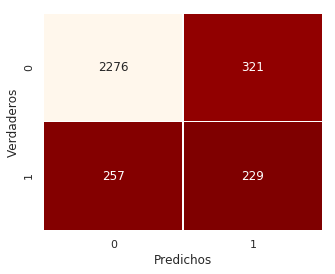

In [0]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

sns.set(rc={'figure.figsize':(5,4)})
sns_cfmx = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=.5, cmap="OrRd_r", cbar=False)

#print(accuracy_score(y_test, y_pred_test))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

sns_cfmx.plot()
fig = sns_cfmx.get_figure()
fig.savefig("{}BestModel_confMatrix_heatmap.png".format(path), dpi=400)

In [0]:
print('Accuracy score = {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score = 0.8125202724618877


In [0]:
from sklearn.metrics import recall_score

# sensitivity = TP / float(FN + TP)
print('Recall score = {}'.format(recall_score(y_test, y_pred)))

Recall score = 0.4711934156378601


In [0]:
from sklearn.metrics import precision_score

# precision = TP / float(TP + FP)
print('Precision score = {}'.format(precision_score(y_test, y_pred)))

Precision score = 0.4163636363636364


Mejor modelo encontrado (área = 0.67)


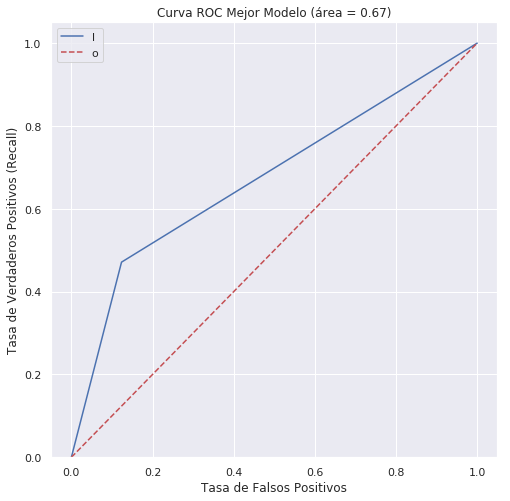

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])


print('Mejor modelo encontrado (área = %0.2f)' % logit_roc_auc)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Mejor modelo encontrado (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title('Curva ROC'+' Mejor Modelo (área = %0.2f)' % logit_roc_auc)
plt.legend("lower right")
plt.savefig("{}BestModel_ROC.png".format(path), dpi=400)
plt.show()

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('Curva ROC del mejor modelo')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.1), rotation=90)
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos (Recall)")
    plt.legend(loc='best')

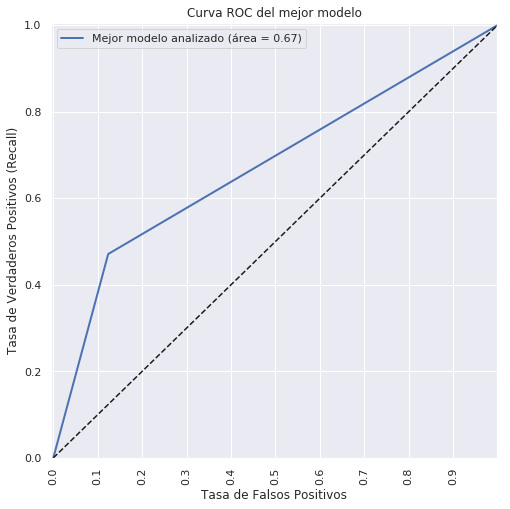

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plot_roc_curve(fpr, tpr, 'Mejor modelo analizado (área = %0.2f)' % logit_roc_auc)